In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

plt.rcParams["font.family"] = "sans-serif"

In [2]:
cd = "C://Users//scottjmk//Dropbox//Research//petra_moser//"

df1 = pd.read_csv(cd+"Replication//Data//MoS1956/MoS1956_Final.csv")
df1 = df1[["unique_id", "academic", "undergradyear", "phdyear", "asstprofyear", "assocprofyear", "profyear", "tenureprofyear", "gender_clean", "child", "yearofmarriage"]]

df2 = df1[df1["academic"] == 1][~df1["asstprofyear"].isnull()]
mos_index = df2.index.tolist()
    
df2["tenurelength"] = df2["tenureprofyear"]-df2["asstprofyear"]

mothers = df2[df2["gender_clean"]=="female"][~df2["child"].isnull()]
other_women = df2[df2["gender_clean"]=="female"][df2["child"].isnull()]
other_married_women = df2[df2["gender_clean"]=="female"][df2["child"].isnull()][~df2["yearofmarriage"].isnull()]
single_women = df2[df2["gender_clean"]=="female"][df2["child"].isnull()][df2["yearofmarriage"].isnull()]
fathers = df2[df2["gender_clean"]=="male"][~df2["child"].isnull()]
other_men = df2[df2["gender_clean"]=="male"][df2["child"].isnull()]
other_married_men = df2[df2["gender_clean"]=="male"][df2["child"].isnull()][~df2["yearofmarriage"].isnull()]
single_men = df2[df2["gender_clean"]=="male"][df2["child"].isnull()][df2["yearofmarriage"].isnull()]

prof_mothers = mothers.groupby("tenurelength").size().reset_index().rename(columns = {0: "prof_mothers"}).sort_values(by = "tenurelength")
prof_other_women = other_women.groupby("tenurelength").size().reset_index().rename(columns = {0: "prof_other_women"}).sort_values(by = "tenurelength")
prof_other_married_women = other_married_women.groupby("tenurelength").size().reset_index().rename(columns = {0: "prof_other_married_women"}).sort_values(by = "tenurelength")
prof_single_women = single_women.groupby("tenurelength").size().reset_index().rename(columns = {0: "prof_single_women"}).sort_values(by = "tenurelength")
prof_fathers = fathers.groupby("tenurelength").size().reset_index().rename(columns = {0: "prof_fathers"}).sort_values(by = "tenurelength")
prof_other_men = other_men.groupby("tenurelength").size().reset_index().rename(columns = {0: "prof_other_men"}).sort_values(by = "tenurelength")
prof_other_married_men = other_married_men.groupby("tenurelength").size().reset_index().rename(columns = {0: "prof_other_married_men"}).sort_values(by = "tenurelength")
prof_single_men = single_men.groupby("tenurelength").size().reset_index().rename(columns = {0: "prof_single_men"}).sort_values(by = "tenurelength")

df = pd.merge(prof_mothers, prof_other_women, on = "tenurelength", how = "outer")
df = pd.merge(df, prof_other_married_women, on = "tenurelength", how = "outer")
df = pd.merge(df, prof_single_women, on = "tenurelength", how = "outer")
df = pd.merge(df, prof_fathers, on = "tenurelength", how = "outer")
df = pd.merge(df, prof_other_men, on = "tenurelength", how = "outer")
df = pd.merge(df, prof_other_married_men, on = "tenurelength", how = "outer")
df = pd.merge(df, prof_single_men, on = "tenurelength", how = "outer")

df.replace(np.nan, 0, inplace = True)
df = df.sort_values(by = "tenurelength")

df["prof_mothers_share"] = 100*df["prof_mothers"]/len(set(zip(mothers["unique_id"])))
df["prof_other_women_share"] = 100*df["prof_other_women"]/len(set(zip(other_women["unique_id"])))
df["prof_other_married_women_share"] = 100*df["prof_other_married_women"]/len(set(zip(other_married_women["unique_id"])))
df["prof_single_women_share"] = 100*df["prof_single_women"]/len(set(zip(single_women["unique_id"])))
df["prof_fathers_share"] = 100*df["prof_fathers"]/len(set(zip(fathers["unique_id"])))
df["prof_other_men_share"] = 100*df["prof_other_men"]/len(set(zip(other_men["unique_id"])))
df["prof_other_married_men_share"] = 100*df["prof_other_married_men"]/len(set(zip(other_married_men["unique_id"])))
df["prof_single_men_share"] = 100*df["prof_single_men"]/len(set(zip(single_men["unique_id"])))

df["cum_prof_mothers_share"] = df["prof_mothers_share"].cumsum()
df["cum_prof_other_women_share"] = df["prof_other_women_share"].cumsum()
df["cum_prof_other_married_women_share"] = df["prof_other_married_women_share"].cumsum()
df["cum_prof_single_women_share"] = df["prof_single_women_share"].cumsum()
df["cum_prof_fathers_share"] = df["prof_fathers_share"].cumsum()
df["cum_prof_other_men_share"] = df["prof_other_men_share"].cumsum()
df["cum_prof_other_married_men_share"] = df["prof_other_married_men_share"].cumsum()
df["cum_prof_single_men_share"] = df["prof_single_men_share"].cumsum()

df

C:\Users\scottjmk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,9,16,17,18,19,27,28,34,52,53,56,57,60,61,65,68,69,108,109,112,113,116,117,120,121,124,125,128,129,172,176,177,180,181,184,185,189,193,197,201,205,209,213,217,221,225,229,233,237,241,356,360,361,364,365,368,369,372,373,376,377,380,381,384,385,388,389,392,393,396,397,400,401,404,405,408,409,412,413,416,417,420,421,424,425,428,429,432,433,436,437,441,445,449,453,457,461,465,469,472,473,477,480,481,484,485,488,489,492,493,534,535,536,537,538,539,575,576,579,580,583,584,587,588,644,648,651,652,655,656,659,660,663,667,671,675,679,727,728,731,732,735,736,739,740,743,744,747,748,751,752,755,756,759,760,763,764,767,768,771,772,775,776,779,780,783,784,787,788,791,792,795,799,800,803,804,807,808,811,819,820,821,822,823,824,825,826,827,828,843,844,845,846,847,865,898,899,900,901,912,913,914,915,916,917,928,929,930,931,932,933,934,936,937,938,939,940,941,942,943,944,969,970,971,972,973,974,

,tenurelength,prof_mothers,prof_other_women,prof_other_married_women,prof_single_women,prof_fathers,prof_other_men,prof_other_married_men,prof_single_men,prof_mothers_share,...,prof_other_married_men_share,prof_single_men_share,cum_prof_mothers_share,cum_prof_other_women_share,cum_prof_other_married_women_share,cum_prof_single_women_share,cum_prof_fathers_share,cum_prof_other_men_share,cum_prof_other_married_men_share,cum_prof_single_men_share
53,-46.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,...,0.033069,0.000000,0.000000,0.000000,0.000000,0.00000,0.006097,0.016418,0.033069,0.000000
54,-36.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.012194,0.016418,0.033069,0.000000
63,-33.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,...,0.000000,0.032605,0.000000,0.000000,0.000000,0.00000,0.012194,0.032835,0.033069,0.032605
64,-30.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.000000,...,0.033069,0.032605,0.000000,0.000000,0.000000,0.00000,0.012194,0.065671,0.066138,0.065210
55,-29.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,...,0.000000,0.032605,0.000000,0.000000,0.000000,0.00000,0.018292,0.082088,0.066138,0.097815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,35.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.000000,...,0.033069,0.032605,40.959410,58.387097,47.325103,61.08325,63.776599,60.876703,56.812169,64.884252
29,36.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.369004,...,0.000000,0.000000,41.328413,58.387097,47.325103,61.08325,63.788793,60.876703,56.812169,64.884252
62,38.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,41.328413,58.387097,47.325103,61.08325,63.794891,60.876703,56.812169,64.884252
68,41.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,...,0.000000,0.032605,41.328413,58.387097,47.325103,61.08325,63.794891,60.893121,56.812169,64.916857


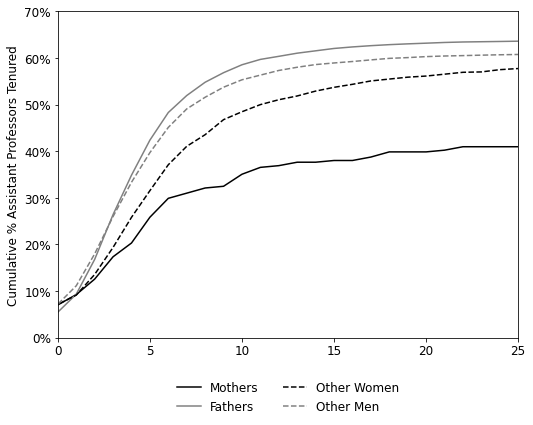

In [8]:
fig, ax1 = plt.subplots(figsize = (8.25, 6))

df.set_index("tenurelength")["cum_prof_mothers_share"].plot(ax = ax1, color = "black", linewidth = 1.5, label = "Mothers")
df.set_index("tenurelength")["cum_prof_fathers_share"].plot(ax = ax1, color = "gray", linewidth = 1.5, label = "Fathers")
df.set_index("tenurelength")["cum_prof_other_women_share"].plot(ax = ax1, color = "black", linewidth = 1.5, linestyle = "--", label = "Other Women")
df.set_index("tenurelength")["cum_prof_other_men_share"].plot(ax = ax1, color = "gray", linewidth = 1.5, linestyle = "--", label = "Other Men")

ax1.set_xlim(0, 25)
ax1.set_ylim(0, 70)
ax1.set_xlabel("", fontsize = 12)
ax1.set_ylabel("Cumulative % Assistant Professors Tenured", fontsize = 12)

ax1.legend(loc = "upper center", bbox_to_anchor = (0.50, -0.1), ncol = 2, frameon = False, fontsize = 12)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0.1))

plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12, rotation = 0)

plt.savefig(cd+"Replication//Output//Figures/Figure6A.jpg", transparent=False, bbox_inches="tight")

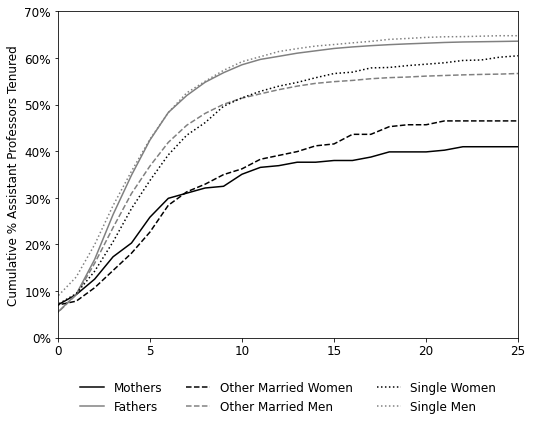

In [7]:
fig, ax1 = plt.subplots(figsize = (8.25, 6))

df.set_index("tenurelength")["cum_prof_mothers_share"].plot(ax = ax1, color = "black", linewidth = 1.5, label = "Mothers")
df.set_index("tenurelength")["cum_prof_fathers_share"].plot(ax = ax1, color = "gray", linewidth = 1.5, label = "Fathers")
df.set_index("tenurelength")["cum_prof_other_married_women_share"].plot(ax = ax1, color = "black", linewidth = 1.5, linestyle = "--", label = "Other Married Women")
df.set_index("tenurelength")["cum_prof_other_married_men_share"].plot(ax = ax1, color = "gray", linewidth = 1.5, linestyle = "--", label = "Other Married Men")
df.set_index("tenurelength")["cum_prof_single_women_share"].plot(ax = ax1, color = "black", linewidth = 1.5, linestyle = ":", label = "Single Women")
df.set_index("tenurelength")["cum_prof_single_men_share"].plot(ax = ax1, color = "gray", linewidth = 1.5, linestyle = ":", label = "Single Men")

ax1.set_xlim(0, 25)
ax1.set_ylim(0, 70)
ax1.set_xlabel("", fontsize = 12)
ax1.set_ylabel("Cumulative % Assistant Professors Tenured", fontsize = 12)

ax1.legend(loc = "upper center", bbox_to_anchor = (0.50, -0.1), ncol = 3, frameon = False, fontsize = 12)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0.1))

plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12, rotation = 0)

plt.savefig(cd+"Replication//Output//Figures/Figure6B.jpg", transparent=False, bbox_inches="tight")